# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

In [22]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *
import researchpy as rp

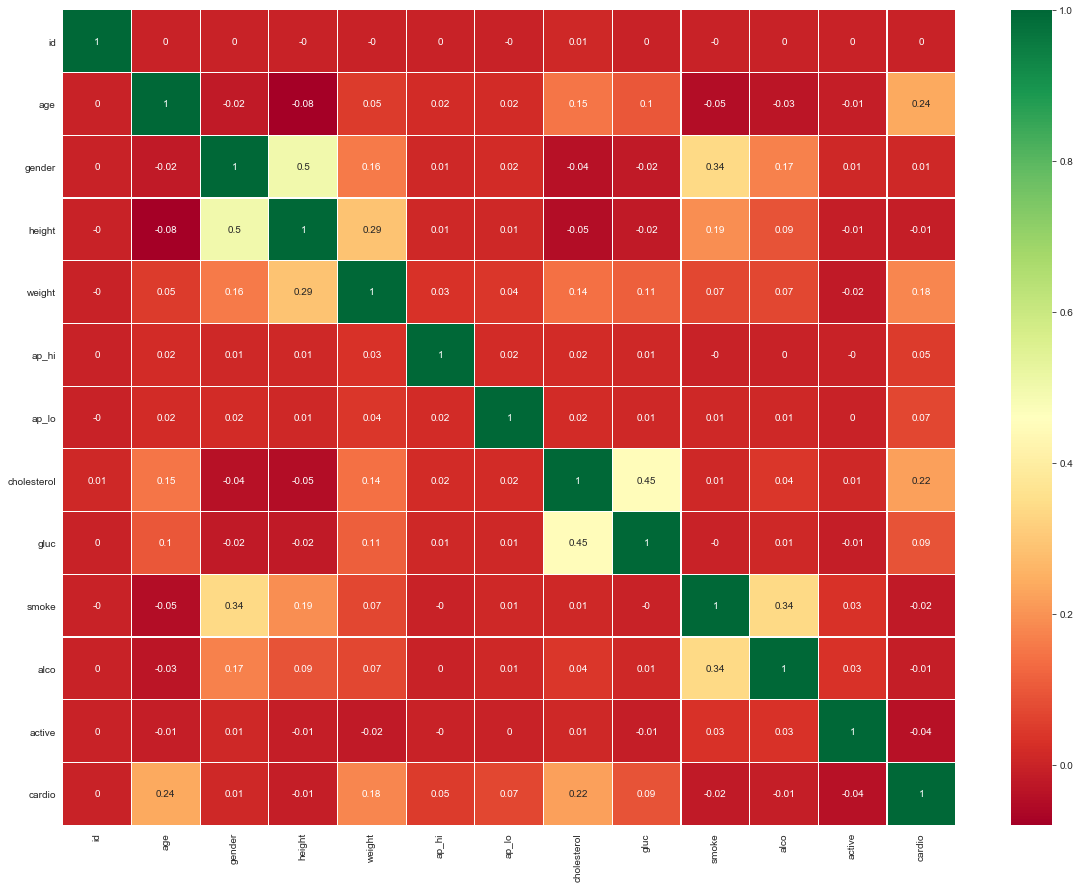

In [4]:
sns.heatmap(data.corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
headers = list(data.columns.values)
df_norm.columns = headers
output_y = data

input_x = df_norm.iloc[:, 1:12]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

targets=output_y['cardio']
#targets=(output_y.iloc[:,:]==1).idxmax(1)

print(targets.value_counts())
Y=le.fit_transform(targets)

from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

0    35021
1    34979
Name: cardio, dtype: int64


In [8]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


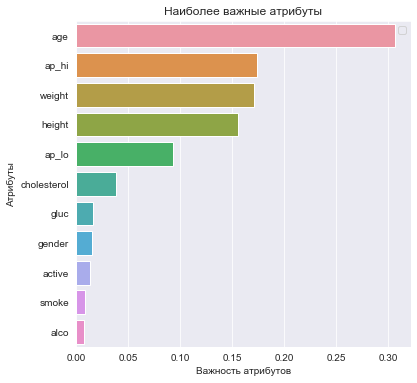

In [9]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [10]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10508
           1       0.72      0.70      0.71     10492

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



0.7155238095238096

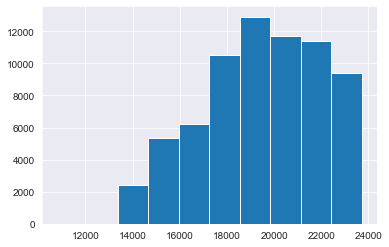

In [11]:
data['age'].hist()

In [12]:
data['age'].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

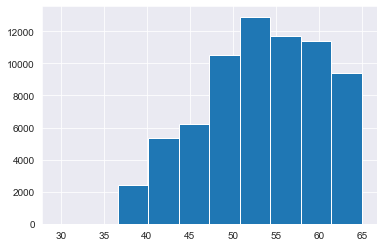

In [13]:
data['age']=data['age']/365
data['age'].hist(bins=10)

In [14]:
data['age'].describe()

count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age, dtype: float64

In [31]:
age_after_53 = data[data['age']>53.339358].cardio
age_before_53 = data[data['age']<=53.339358].cardio

In [32]:
len(age_after_53)

38460

In [33]:
len(age_before_53)

31540

In [34]:
descriptives, results = rp.ttest(age_before_53,age_after_53)
print(descriptives)
print('_____________________________')
print(results)

   Variable        N      Mean        SD       SE  95% Conf.  Interval
0    cardio  31540.0  0.392422  0.488298  0.00275   0.387033  0.397811
1    cardio  38460.0  0.587676  0.492259  0.00251   0.582756  0.592595
2  combined  70000.0  0.499700  0.500003  0.00189   0.495996  0.503404
_____________________________
                Independent t-test     results
0  Difference (cardio - cardio) =      -0.1953
1            Degrees of freedom =   69998.0000
2                             t =     -52.4040
3         Two side test p value =       0.0000
4        Difference < 0 p value =       0.0000
5        Difference > 0 p value =       1.0000
6                     Cohen's d =      -0.3981
7                     Hedge's g =      -0.3981
8                 Glass's delta =      -0.3999
9                             r =       0.1943


p value = 0.0000, то отличие людей с возрастом более 53  значительное

In [35]:
stats.ttest_ind(age_before_53,age_after_53)

Ttest_indResult(statistic=-52.404041855181084, pvalue=0.0)

Значит, люди с возрастом более 53 болеют чаще, чем остальные (среднее значение выборки больше чем остальных)